# Traces with network manager
This notebook just illustrates the role of the time constants in the traces and furthermore works as a function test of the new class. The network manager.

In [1]:
from __future__ import print_function
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

from network import BCPNN, NetworkManager
from data_transformer import build_ortogonal_patterns
from analysis_functions import calculate_angle_from_history
from analysis_functions import calculate_winning_pattern_from_distances, calculate_patterns_timings

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

np.set_printoptions(suppress=True, precision=2)

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '39de00787555d13af5b9820bebd10f6b56accfc3'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

#### Network
We build the patterns and the network

In [3]:
hypercolumns = 2
minicolumns = 3
n_patterns = 3  # Number of patterns

patterns_dic = build_ortogonal_patterns(hypercolumns, minicolumns)
patterns = list(patterns_dic.values())
patterns = patterns[:n_patterns]

# Build the network
tau_z_pre = 0.500
tau_z_post = 0.050

nn = BCPNN(hypercolumns, minicolumns, tau_z_post=tau_z_post, tau_z_pre=tau_z_pre)
nn.randomize_pattern()

Now we build the network manager and run the model in training mode with the patterns that we already build

In [4]:
dt = 0.001
T_training = 2.0
training_time = np.arange(0, T_training + dt, dt)
values_to_save = ['o', 'z_pre', 'z_post', 'a']
manager = NetworkManager(nn=nn, time=training_time, values_to_save=values_to_save)

for pattern in patterns:
    nn.k = 1.0
    print('trained')
    # history = nn.run_network_simulation(time=training_time, I=pattern, save=True)
    manager.run_network(time=training_time, I=pattern)
    manager.run_network(time=training_time)

trained
trained
trained


#### Plots
We extract the information and plot the different state variables

In [5]:
history = manager.history
total_time = np.arange(0, n_patterns* 2 * (T_training + dt), dt)

z_pre_hypercolum = history['z_pre'][..., :minicolumns]
z_post_hypercolum = history['z_post'][..., :minicolumns]
o_hypercolum = history['o'][..., :minicolumns]
a_hypercolum = history['a'][..., :minicolumns]

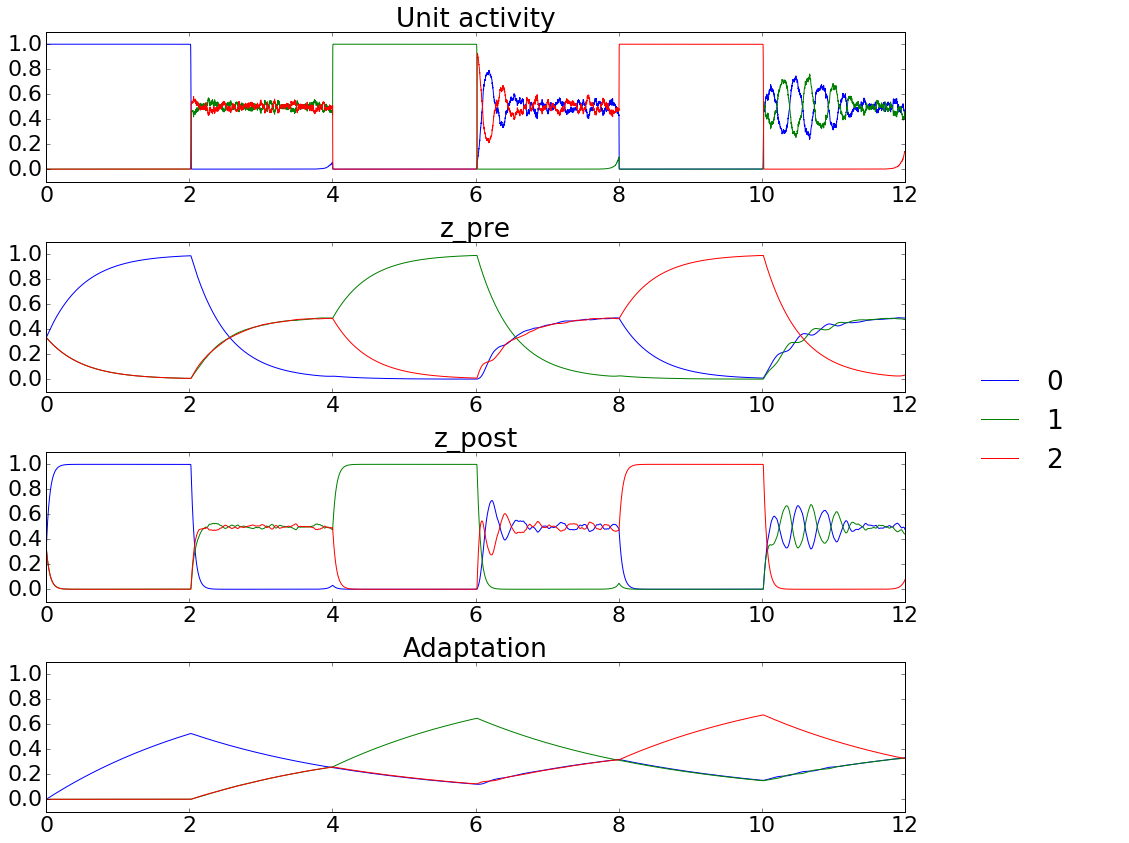

In [6]:
# Plot z_traces
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

fig.tight_layout()
fig.subplots_adjust(right=0.8)

for index in range(minicolumns):
    ax1.plot(total_time, o_hypercolum[:, index], label=str(index))
    ax2.plot(total_time, z_pre_hypercolum[:, index], label=str(index))
    ax3.plot(total_time, z_post_hypercolum[:, index], label=str(index))
    ax4.plot(total_time, a_hypercolum[:, index], label=str(index))

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='right', borderpad=2.0, fancybox=True, frameon=False, shadow=True)


ax1.set_ylim([-0.1, 1.1])
ax1.set_xlim([0, 12])
ax2.set_ylim([-0.1, 1.1])
ax2.set_xlim([0, 12])
ax3.set_ylim([-0.1, 1.1])
ax3.set_xlim([0, 12])
ax4.set_ylim([-0.1, 1.1])
ax4.set_xlim([0, 12])

ax1.set_title('Unit activity')
ax2.set_title('z_pre')
ax3.set_title('z_post')
ax4.set_title('Adaptation')

In this plot we can appreciate the different time constants taking actions we had:
tau_z_pre = 0.500
tau_z_post = 0.050

So the z_post time constant is ten times faster than the z_pre time constant. We can appreciate the z_post grows very fast and decays at the same rate. We can say that z_pre has a long term memory whereas z_post has a very short one. 

## 

In [7]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])